# Uncertainty on flux ratios

The magnitude and associated uncertainty (standard error) of 2 objects is given by: 
- $m1 = 20.34 \pm 0.18$mag
- $m2 = 18.94 \pm 0.03$mag   

The 2 measurements are independant of each other and the uncertainty on the magnitude follows a normal distribution.  
  
Knowing that the magnitude is defined as $m = -2.5 \log10(F) + zpt$, where zpt is a constant value. Calculate, using a Monte-Carlo approach, the uncertainty on the flux ratio $F_2 / F_1$? 

Does the uncertainty on $F_2 / F_1$ follow a Gaussian distribution? 

Fit a normal distribution on your Monte-Carlo-based distribution of the flux ratio and overplot the pdf of this fitted normal distribution.  

*BONUS:* 
Fit and overplot a lognormal (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) and a gamma distribution (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)

In [5]:
import numpy as np
import scipy.stats 
from matplotlib import pyplot as plt

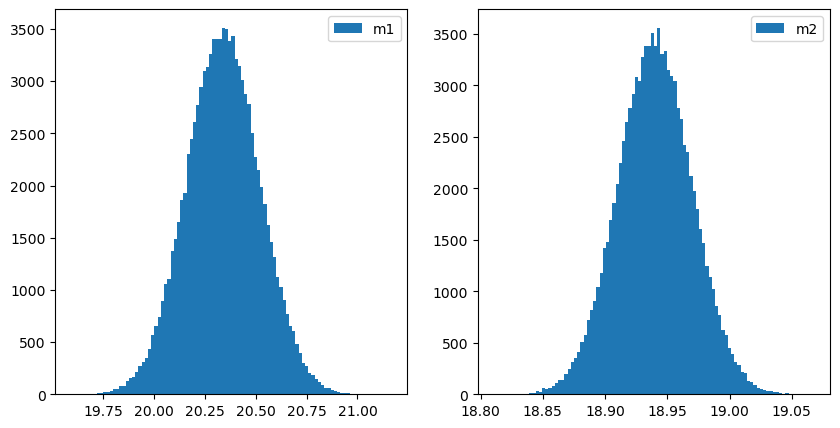

In [21]:
# Generate distributions associated to m1 and m2
N_m1 = scipy.stats.norm(20.34, 0.18)
N_m2 = scipy.stats.norm(18.94, 0.03)

# Create samples drawn from N(m1, s1), N(m2, s2)
npts = 100000
sample_m1 = N_m1.rvs(npts)
sample_m2 = N_m2.rvs(npts)

# Display the distributions for m1 and m2 
f, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].hist(sample_m1, bins=100, label='m1')
ax[1].hist(sample_m2, bins=100, label='m2')
[ax[i].legend() for i in range(2)];

mean Flux ratio = 0.279 +/-  0.047
Param of gamma distrib. =  (17.763580658446806, 0.0804378397687504, 0.01119412821406866)
Param of lognorm =  (0.16295565713068816, -0.00856666335940803, 0.2840543262121017)


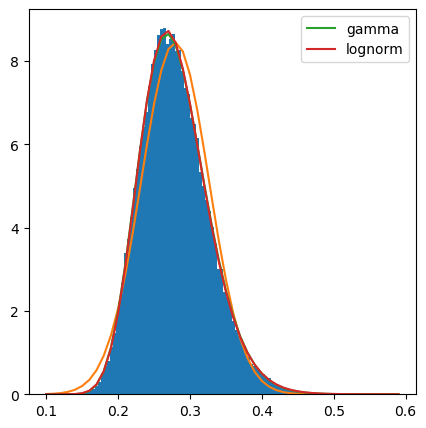

In [22]:
# Uncertainty on the flux ratio F_1 / F_2 
sample_F_ratio = 10**(-0.4 * (sample_m1 - sample_m2)) 
f, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.hist(sample_F_ratio, bins=100, density=True);
F_ratio_mean = np.nanmean(sample_F_ratio)
F_ratio_std = np.nanstd(sample_F_ratio, ddof=1)
print('mean Flux ratio = %.3f +/-  %.3f'%(F_ratio_mean, F_ratio_std))
# Let's overlay a normal distribution with those properties
N_Fratio = scipy.stats.norm(F_ratio_mean, F_ratio_std)
x = np.arange(0.1, 0.6, 0.01)
ax.plot(x, N_Fratio.pdf(x)); 

# Fit of the flux ratio with a gamma distribution 
gamma_fit = scipy.stats.gamma.fit(sample_F_ratio)
print('Param of gamma distrib. = ', gamma_fit)
k_gamma = scipy.stats.gamma.pdf(x, *gamma_fit)
ax.plot(x, k_gamma, label='gamma')
ax.legend()

# Fit of a log normal distribution 
lognorm_fit = scipy.stats.lognorm.fit(sample_F_ratio)  #, floc=0)  
k_lognorm = scipy.stats.lognorm.pdf(x, *lognorm_fit)
print('Param of lognorm = ', lognorm_fit)
ax.plot(x, k_lognorm, label='lognorm')
ax.legend()

In [26]:
# A simple way to calculate a 90% CI from that Monte-Carlo histogram
np.percentile(sample_F_ratio, (5, 95))

array([0.20857862, 0.36256566])

In [24]:
print('%.2f, %.2f'%(sample_F_ratio.mean(), sample_F_ratio.std() ))

0.28, 0.05


The probability density of flux ratios follows a log normal.

$$
f(x, s) = \frac{1}{s\times \sqrt{2\pi}} \exp\left(-\frac{\log^2(x)}{2s^2}\right)
$$

In [25]:
help(scipy.stats.lognorm)

Help on lognorm_gen in module scipy.stats._continuous_distns object:

class lognorm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  lognorm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A lognormal continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `lognorm` is:
 |  
 |  .. math::
 |  
 |      f(x, s) = \frac{1}{s x \sqrt{2\pi}}
 |                \exp\left(-\frac{\log^2(x)}{2s^2}\right)
 |  
 |  for :math:`x > 0`, :math:`s > 0`.
 |  
 |  `lognorm` takes ``s`` as a shape parameter for :math:`s`.
 |  
 |  %(after_notes)s
 |  
 |  A common parametrization for a lognormal random variable ``Y`` is in
 |  terms of the mean, ``mu``, and standard deviation, ``sigma``, of the
 |  unique normally distributed random variable ``X`` such that exp(X) = Y.
 |  This parametrization corresponds to setting ``s = sigma`` and ``scale =
 |  exp(